In [106]:
''' 
COLBITS SAS 

Se hará uso de la herramienta de Machine Learning: K-Means para realizar el clustering de una serie de datos 
correspondiente a la aparición de fenómenos perjudiciales (como perdida de datos) en la comunicación de información 
telemétrica entre diferentes loggers de Cenicaña y los Gateways dispuestos para tal función.

'''

' \nCOLBITS SAS \n\nSe hará uso de la herramienta de Machine Learning: K-Means para realizar el clustering de una serie de datos \ncorrespondiente a la aparición de fenómenos perjudiciales (como perdida de datos) en la comunicación de información \ntelemétrica entre diferentes loggers de Cenicaña y los Gateways dispuestos para tal función.\n\n'

In [107]:
import pandas as pd
import matplotlib.pyplot as plt

# Se carga el archivo CSV en la variable gws_df
gws_df = pd.read_csv('gws_info.csv')
gws_df.head(10)

,name,snr (dB),rssi (dBm),Record Count
0,GW_LA_GRAN_LUCHA,-0.50,-109,6123
1,GW_BUENA_VISTA,-5.20,-99,4081
2,GW_MUSEO,-3.80,-104,3889
3,GW_GUACARI,-4.80,-104,3516
4,GW_CAMBIASO,-9.20,-115,3180
5,GW_RITA,-2.50,-108,2969
6,GW_AMAIME,-1.35,-107,2742
7,GW_ROZO,-8.50,-111,2078
8,GW_ORTIGAL,-20.20,-100,1471
9,GW_SAN_JERONIMO,-3.80,-108,1452


In [108]:
# Se obtiene información del tipo de variable que corresponde a cada columna
gws_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          32 non-null     object 
 1   snr (dB)      32 non-null     float64
 2   rssi (dBm)    32 non-null     int64  
 3   Record Count  32 non-null     int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 1.1+ KB


In [109]:
'''
Se ajusta la columna denominada 'name' por 'id', de tal forma que no haya conflicto por el tipo de dato. Remitirse al
archivo CSV para saber qué ID corresponde a cada GW

'''

gws_df.insert(0, 'id', range(len(gws_df)))
gws_df_adjusted = gws_df.drop('name', axis=1)
gws_df_adjusted.head(10)

,id,snr (dB),rssi (dBm),Record Count
0,0,-0.50,-109,6123
1,1,-5.20,-99,4081
2,2,-3.80,-104,3889
3,3,-4.80,-104,3516
4,4,-9.20,-115,3180
5,5,-2.50,-108,2969
6,6,-1.35,-107,2742
7,7,-8.50,-111,2078
8,8,-20.20,-100,1471
9,9,-3.80,-108,1452


In [110]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Se normalizan todos los datos, con excepción del id, con ayuda de la función StandardScaler().
X = gws_df_adjusted.values[:,1:]
X = np.nan_to_num(X)
clus_dataset = StandardScaler().fit_transform(X)
clus_dataset

array([[ 1.17752235,  0.2584195 ,  3.23302103],
       [ 0.5197717 ,  1.91230431,  1.89013675],
       [ 0.71569743,  1.08536191,  1.76387143],
       [ 0.57575048,  1.08536191,  1.51857474],
       [-0.04001608, -0.73391139,  1.29761043],
       [ 0.89762846,  0.42380798,  1.15885011],
       [ 1.05856745,  0.58919646,  1.00956768],
       [ 0.05794678, -0.07235746,  0.57290011],
       [-1.57943249,  1.74691583,  0.17371757],
       [ 0.71569743,  0.42380798,  0.16122256],
       [ 1.03757541, -0.73391139, -0.07684017],
       [ 0.93961254,  0.2584195 , -0.24059051],
       [ 1.13553827, -0.40313442, -0.41815111],
       [-0.15197364,  0.2584195 , -0.46155482],
       [ 0.57575048, -0.40313442, -0.47010403],
       [-0.85170837,  2.40846976, -0.49377878],
       [ 0.05794678, -0.40313442, -0.49575168],
       [-0.99165531,  2.0776928 , -0.50956194],
       [-1.27154921, -1.39546531, -0.57400987],
       [ 0.71569743, -0.40313442, -0.57927092],
       [-0.80272694, -1.56085379, -0.584

In [111]:
from sklearn.cluster import KMeans 

# Se instancia el algoritmo K-Means y se ajusta con los datos de X
k_means = KMeans(init='k-means++', n_clusters=3, n_init=24)
k_means.fit(X)
labels = k_means.labels_
print(labels)

[2 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [112]:
# Se asocian los labels con cada elemento de la tabla correspondiente
gws_df_adjusted['clus_km'] = labels
gws_df_adjusted.head()

,id,snr (dB),rssi (dBm),Record Count,clus_km
0,0,-0.5,-109,6123,2
1,1,-5.2,-99,4081,1
2,2,-3.8,-104,3889,1
3,3,-4.8,-104,3516,1
4,4,-9.2,-115,3180,1


In [113]:
# Finalmente, se agrupan con base en ese criterio
gws_df_adjusted.groupby('clus_km').mean()

,id,snr (dB),rssi (dBm),Record Count
clus_km,,,,
0,19.5,-10.391667,-111.708333,418.375000
1,4.0,-5.050000,-106.857143,3207.857143
2,0.0,-0.500000,-109.000000,6123.000000


In [114]:
# Se exportan los datos
gws_df_adjusted.to_csv('data_gws_processed.csv', index=False)

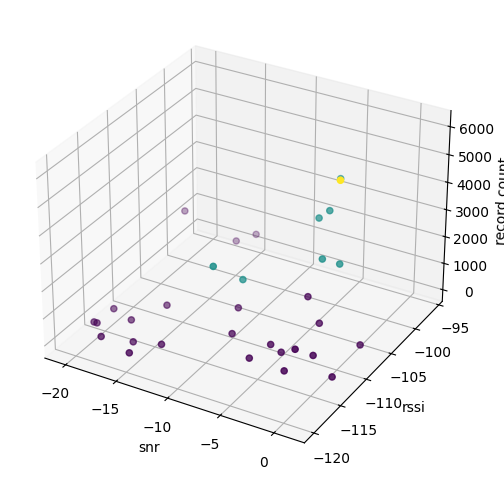

In [115]:
# Gráfico en 3D
fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

x_data = X[:, 0]
y_data = X[:, 1]
z_data = X[:, 2]

ax.scatter(x_data, y_data, z_data, c=labels.astype(float))

ax.set_xlabel('snr')
ax.set_ylabel('rssi')
ax.set_zlabel('record count')

plt.show()


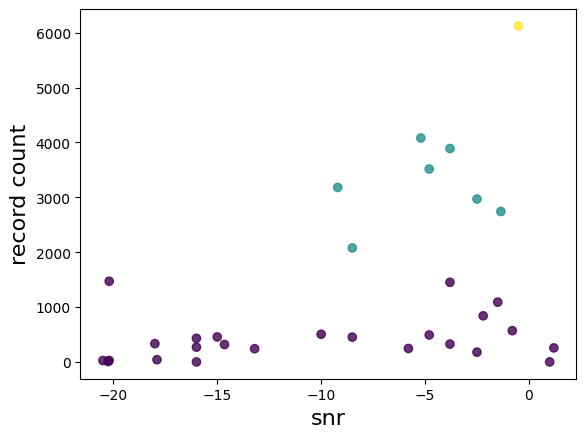

In [116]:
# Gráfico en 2D (snr vs record count)
plt.scatter(X[:, 0], X[:, 2], c=labels.astype(float), alpha=0.8)
plt.xlabel('snr', fontsize=16)
plt.ylabel('record count', fontsize=16)

plt.show()

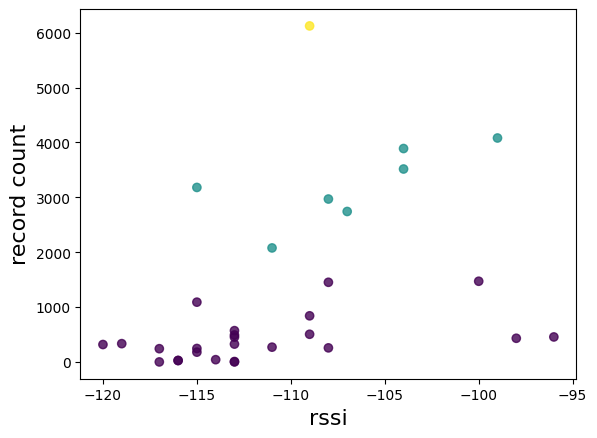

In [117]:
# Gráfico en 2D (rssi vs record count)

plt.scatter(X[:, 1], X[:, 2], c=labels.astype(float), alpha=0.8)
plt.xlabel('rssi', fontsize=16)
plt.ylabel('record count', fontsize=16)

plt.show()